## Predictive Analytics in Hospital Admission Rates:<br>A Machine Learning Approach

##### Dataset: D4_Hospital Admissions by Statistic, Year and State

In [26]:
import pandas as pd
import requests
import io
import csv

#### DATA COLLECTION

In [40]:

# Option 1: Read csv from local scource.
local_url = "D4_Hospital Admissions by Statistic, Year and State.csv"
df_raw = pd.read_csv(local_url)

# Option 2: Download csv form API
url = "https://ws.cso.ie/public/api.restful/PxStat.Data.Cube_API.ReadDataset/HRA01/CSV/1.0/en"
res = requests.get(url)

def detect_delimiter(csv_text):
    """
    Detect the delimiter in a CSV string.
    :param csv_text
    :return: The detected delimiter.
    """
    sniffer = csv.Sniffer()
    try:
        # Use the Sniffer class to detect the delimiter
        dialect = sniffer.sniff(csv_text)
        return dialect.delimiter
    except csv.Error:
        return None

# Check the delimiter
delimiter = detect_delimiter(res.text[:1000])  # Checking the first 1000 characters
df_raw = pd.read_csv(io.StringIO(res.text), delimiter=delimiter)

print(f"\nPREPROCESSING EXPLORATION\n***************************",
      f"\n\nSHAPE: {df_raw.shape} \n\n**DATA TYPES**\n{df_raw.dtypes}",
     f"\n\n**DATA DESCRIPTION** \n{df_raw.describe()}",
     f"\n\n**MISSING VALUES**\n{df_raw.isnull().sum()}",
     f"\n\nDATA FRAME:\n{df_raw.head()}\n\n")



PREPROCESSING EXPLORATION
*************************** 

SHAPE: (464, 8) 

**DATA TYPES**
ï»¿"STATISTIC"      object
Statistic Label     object
TLIST(A1)            int64
Year                 int64
C02196V02652        object
State               object
UNIT                object
VALUE              float64
dtype: object 

**DATA DESCRIPTION** 
         TLIST(A1)         Year         VALUE
count   464.000000   464.000000    409.000000
mean   1993.500000  1993.500000   6647.686797
std      16.758738    16.758738   8844.659130
min    1965.000000  1965.000000     27.000000
25%    1979.000000  1979.000000     72.000000
50%    1993.500000  1993.500000    683.000000
75%    2008.000000  2008.000000  12043.000000
max    2022.000000  2022.000000  29392.000000 

**MISSING VALUES**
ï»¿"STATISTIC"      0
Statistic Label     0
TLIST(A1)           0
Year                0
C02196V02652        0
State               0
UNIT                0
VALUE              55
dtype: int64 

DATA FRAME:
  ï»¿"STATISTIC"  

 ##### Data Characteristics:<br>
Numerical Features: These include the 'Year' and 'VALUE' columns, where 'VALUE' represents the number of admissions. There is a large variability in the 'VALUE' data with a right-skewed distribution.
Categorical Features: The 'STATISTIC' and 'Statistic Label' are categorical, with the 'Statistic Label' indicating the type of admission (e.g., 'First Admissions', 'Re-Admissions', 'All Admissions').
2. Data Collection and Manipulation:
This step would normally involve understanding how the data was collected (e.g., hospital records, surveys) and any initial transformations applied to the data. Since I don't have information about the data collection process, you would need to refer to the source or methodology section from where the data was obtained.

### DATA PREPROCESSING:
*   The "C02196V02652" column has only "-" | Dropped.
*   'TLIST(A1)' is duplicate of 'Year'. | Dropped.
*   'State' is non informative. | Dropped
*   55 insignificant missing values in "Value". 55 rows | Dropped.

In [30]:
# Ensuring UNIT column consistence according to the Statistic Label column
unit_mapping = {
    "First Admissions (Number)": "Number",
    "Re-Admissions (Number)": "Number",
    "All Admissions (Number)": "Number",
    "First Admissions as a % of All Admissions (Number)": "Number",
    "Re-Admissions as a % of All Admissions (Number)": "Number",
    "First Admissions (Rate per 100,000 Pop.)": "Rate per 100,000 Pop.",
    "Re-Admissions (Rate per 100,000 Pop.)": "Rate per 100,000 Pop.",
    "All Admissions (Rate per 100,000 Pop.)": "Rate per 100,000 Pop."
}
# Apply the mapping to ensure the 'UNIT' column is correct
df_raw['UNIT'] = df_raw['Statistic Label'].map(unit_mapping)

# Dropping the 'C02196V02652' column
df_cleaned = df_raw.drop(columns=['TLIST(A1)', 'C02196V02652', 'State'])

# Remove rows where the 'Value' column is empty
df_cleaned = df_cleaned.dropna(subset=['VALUE'])

# Store processed data
df_cleaned.to_csv("df_cleaned.csv")


In [31]:
df_stats = pd.read_csv("df_cleaned.csv")

print(f"\nPOST PROCESSIGN EXPLORATION\n{'*'*25}\n\nSHAPE: {df_stats.shape}")

df_stats.head(), df_stats.dtypes, df_stats.isnull().sum(), df_stats.describe() 



POST PROCESSIGN EXPLORATION
*************************

SHAPE: (409, 6)


(   Unnamed: 0 ï»¿"STATISTIC"            Statistic Label  Year    UNIT   VALUE
 0           0        HRA01C1  First Admissions (Number)  1965  Number  6666.0
 1           1        HRA01C1  First Admissions (Number)  1966  Number  6676.0
 2           2        HRA01C1  First Admissions (Number)  1967  Number  6927.0
 3           3        HRA01C1  First Admissions (Number)  1968  Number  7284.0
 4           4        HRA01C1  First Admissions (Number)  1969  Number  7652.0,
 Unnamed: 0           int64
 ï»¿"STATISTIC"      object
 Statistic Label     object
 Year                 int64
 UNIT                object
 VALUE              float64
 dtype: object,
 Unnamed: 0         0
 ï»¿"STATISTIC"     0
 Statistic Label    0
 Year               0
 UNIT               0
 VALUE              0
 dtype: int64,
        Unnamed: 0         Year         VALUE
 count  409.000000   409.000000    409.000000
 mean   212.202934  1993.701711   6647.686797
 std    131.227278    16.864193   8844.659130
 min      

### DATA VISUALISATION



#### Distribution of Hospital Admissions

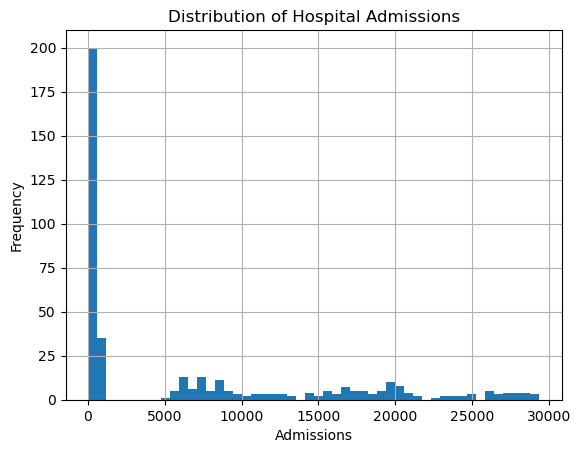

In [32]:
import matplotlib.pyplot as plt

df = pd.read_csv("df_cleaned.csv")
df['VALUE'].hist(bins=50)
plt.title('Distribution of Hospital Admissions')
plt.xlabel('Admissions')
plt.ylabel('Frequency')
plt.show()


The histogram shows a heavily right-skewed distribution, with the majority of values clustering at the lower end of admissions. This suggests that high admission counts are less frequent.
There's a large peak at the very beginning of the histogram, which could represent a mode or a large number of smaller hospitals with fewer admissions.

#### Trend of Hospital Admissions over Time.

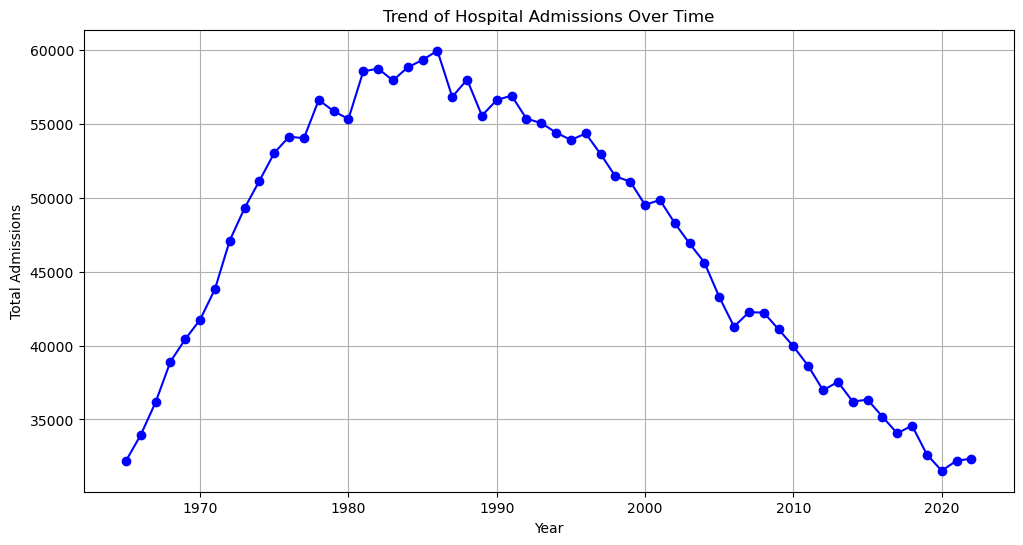

In [24]:
import matplotlib.pyplot as plt


df_csv = pd.read_csv("df_cleaned.csv")

# Grouping data by year and summing admissions
admissions_per_year = df_csv.groupby('Year')['VALUE'].sum()

    # Plotting
plt.figure(figsize=(12, 6))
admissions_per_year.plot(kind='line', color='blue', marker='o')
plt.title('Trend of Hospital Admissions Over Time')
plt.xlabel('Year')
plt.ylabel('Total Admissions')
plt.grid(True)
plt.show()


The trend plot indicates a non-linear pattern in hospital admissions over the years. There seem to be peaks and troughs suggesting periods of increase and decrease in admissions.
The lines could represent different types of admissions, and it seems like one category outnumbers the others significantly, peaking around the late 1980s to early 1990s before declining.

##### Comparison of Hospital Admission Types Over Time

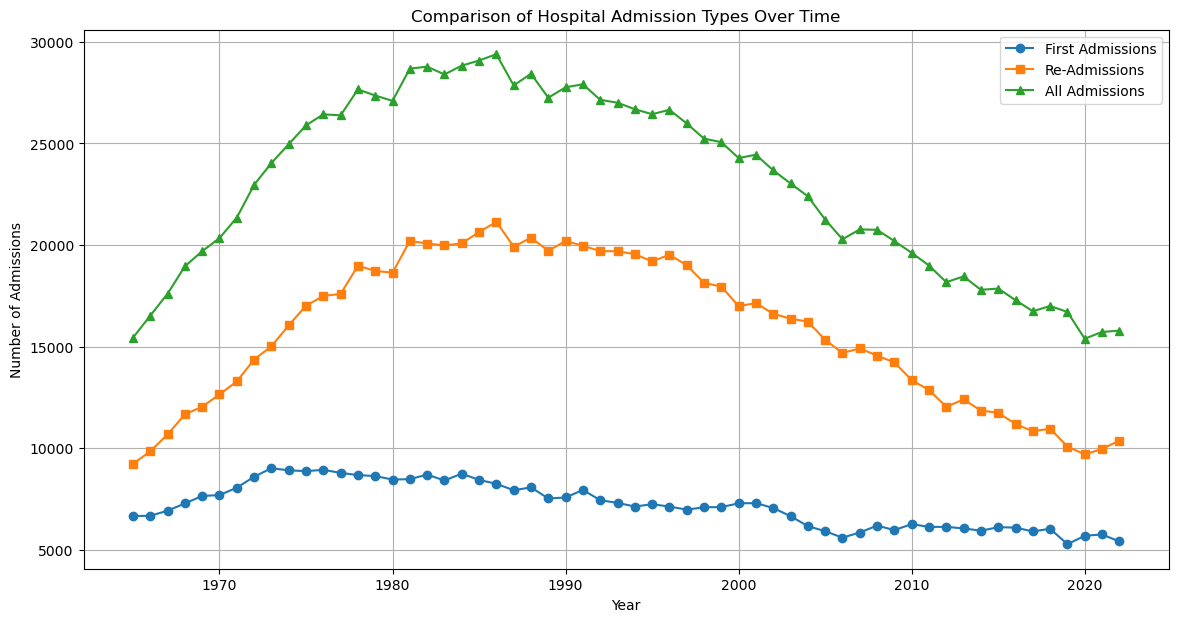

In [ ]:
import matplotlib.pyplot as plt

df = pd.read_csv("df_cleaned.csv")

# Filtering the dataset for each admission type
first_admissions = df[df['Statistic Label'] == 'First Admissions (Number)']
re_admissions = df[df['Statistic Label'] == 'Re-Admissions (Number)']
all_admissions = df[df['Statistic Label'] == 'All Admissions (Number)']

plt.figure(figsize=(14,7))

plt.plot(first_admissions['Year'], first_admissions['VALUE'], marker='o', label='First Admissions')
plt.plot(re_admissions['Year'], re_admissions['VALUE'], marker='s', label='Re-Admissions')
plt.plot(all_admissions['Year'], all_admissions['VALUE'], marker='^', label='All Admissions')

plt.title('Comparison of Hospital Admission Types Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Admissions')
plt.legend()
plt.grid(True)
plt.show()


This plot clearly differentiates the trends between 'First Admissions', 'Re-Admissions', and 'All Admissions'.
There was an upward trend in all admission types until it peaked, after which 'First Admissions' and 'All Admissions' showed a significant decline, while 'Re-Admissions' showed a more stable trend before declining.
The peak and subsequent decline could be indicative of changes in healthcare policies, improvements in health, or other external factors.

##### Boxplot of Hospital Admissions - Detect Outliers

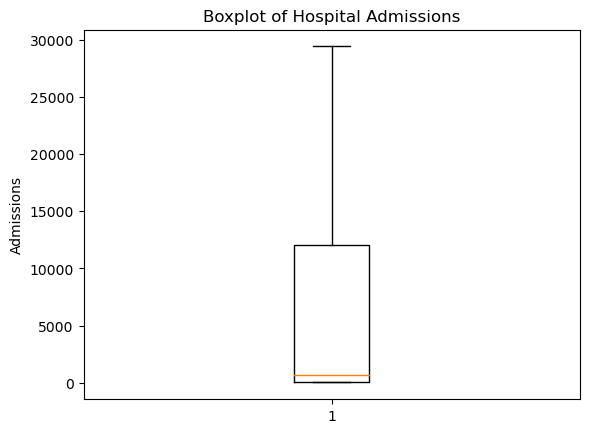

In [12]:

df = pd.read_csv("df_cleaned.csv")
plt.boxplot(df['VALUE'])
plt.title('Boxplot of Hospital Admissions')
plt.ylabel('Admissions')
plt.show()

The boxplot shows the median, quartiles, and potential outliers in the admissions data.
It appears that there are outliers on the higher end, which corresponds to the tail we saw in the histogram. These could be larger hospitals or years with unusually high admission rates.

### DATA IMBALANCE

##### Class distribution of hospital admissions based on median threshold

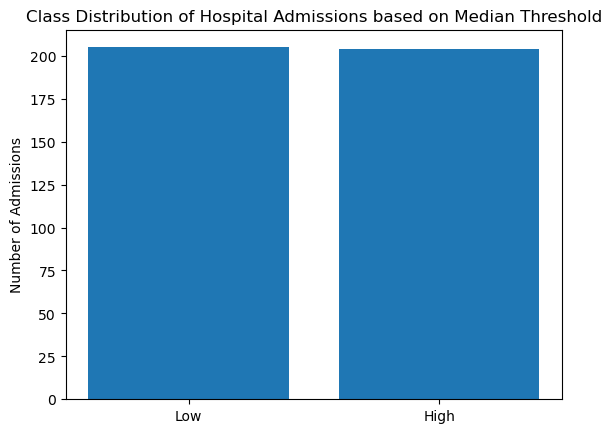

In [13]:
df_ml = pd.read_csv("df_cleaned.csv")
median_value = df_ml['VALUE'].median()

# Creating a new binary column based on the median threshold
df_ml['Admission_Class'] = (df_ml['VALUE'] > median_value).astype(int)

df_ml.to_csv("df_ml")

# Now plot the distribution of the binary outcomes
class_counts = df_ml['Admission_Class'].value_counts()

plt.bar(class_counts.index, class_counts.values, tick_label=['Low', 'High'])
plt.ylabel('Number of Admissions')
plt.title('Class Distribution of Hospital Admissions based on Median Threshold')

plt.show()


The bar chart shows the class distribution of hospital admissions based on the median threshold. From the visualization, it is clear that the classes are quite balanced. This indicates that using the median as a threshold results in nearly equal numbers of 'Low' and 'High' admissions.

### MACHINE LEARNING ALGORITHMS

##### Random Forest

QUESTION 1: "To pedict whether a particular year will have a high or low number of hospital admissions based on historical data?"

This is a classification problem where the goal is to predict a binary outcome: 'High' or 'Low' admission rates. To address this question with machine learning, we could use several algorithms, but given the nature of the dataset and the problem, a good starting point would be a Random Forest Classifier

The choice of Random Forest is due to the following:
Robustness: Random Forest is less likely to overfit than some other models because it builds multiple decision trees and merges their outputs.
Handling Non-Linearity: It can handle complex interactions between features and is not limited to linear decision boundaries.
Feature Importance: Random Forest can provide insights into which features are most important for the classification, which can be valuable for understanding the factors affecting hospital admissions.
Ease of Use: It generally performs well out of the box with default parameters and doesn't require extensive parameter tuning.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import pandas as pd

df_ml = pd.read_csv("df_ml")
# Assume 'data' is your DataFrame
X = df_ml.drop(['Admission_Class', 'STATISTIC', 'Statistic Label', 'UNIT'], axis=1)  # Dropping non-feature columns
y = df_ml['Admission_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Training the model
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Evaluate the model
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        47

    accuracy                           1.00        82
   macro avg       1.00      1.00      1.00        82
weighted avg       1.00      1.00      1.00        82



##### Gradient Boosting Machines (GBM)

QUESTION 2: What factors contribute most to high hospital admission rates?

For this question, we use a Feature Importance Analysis within A GBM model to determine which features are the most predictive of high admission rates.

GBMs, specifically implementations like XGBoost or LightGBM, are powerful for feature importance analysis due to their built-in methods for assessing feature relevance.
These models can handle non-linear relationships and interactions between features very well.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score


df_ml2 = pd.read_csv("df_ml")

# Creating lag features for the past 1 year and 2 years
df_ml2['Lag_1'] = df_ml2['VALUE'].shift(1)
df_ml2['Lag_2'] = df_ml2['VALUE'].shift(2)

# Creating a 3-year rolling mean
df_ml2['Rolling_Mean_3yr'] = df_ml2['VALUE'].rolling(window=3).mean()

# Drop the rows with NaN values that were created by shifting and rolling
df_ml2 = df_ml2.dropna()

X = df_ml2.drop(['Admission_Class', 'STATISTIC', 'Statistic Label', 'UNIT'], axis=1)
y = df_ml2['Admission_Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Print the ev
# print(accuracy)
# print(roc_auc)
# print(conf_matrix)
print(class_report)


              precision    recall  f1-score   support

           0       1.00      0.94      0.97        35
           1       0.96      1.00      0.98        47

    accuracy                           0.98        82
   macro avg       0.98      0.97      0.97        82
weighted avg       0.98      0.98      0.98        82



Precision:
For class 0 ('Low'), the precision is 1.00, meaning that every instance the model predicted to be 'Low' was indeed 'Low'.
For class 1 ('High'), the precision is 0.96, suggesting that the model is slightly more likely to predict 'High' when it's not the case.

Recall:
For class 0, the recall is 0.94, indicating that the model captured 94% of the actual 'Low' cases.
For class 1, the recall is 1.00, meaning the model identified all the actual 'High' cases correctly.

F1-Score:
The F1-scores are high for both classes (0.97 for 'Low' and 0.98 for 'High'), which is a measure of a test's accuracy. It considers both the precision and the recall to compute the score. A high F1 score (close to 1.0) is indicative of a robust model.

Support:
The support is the number of actual occurrences of the class in the dataset. There are 35 instances of 'Low' and 47 of 'High' in the test set.

Accuracy:
The overall accuracy of the model is 0.98, which is very high and suggests that the model is performing very well on this dataset.

Macro Avg:
The macro average gives equal weight to each class. With macro averages of 0.98 for precision, 0.97 for recall, and 0.97 for the F1-score, we see that the model is performing well across both classes, not just the majority class.

Weighted Avg:
The weighted average accounts for class imbalance by weighting the metrics by the number of instances in each class. The weighted averages are very similar to the macro averages, indicating that any class imbalance does not significantly affect the model's performance.

##### XGBooster Feature Importance

c:\Users\Admin\anaconda3\Lib\site-packages\xgboost\core.py:160: UserWarning: [03:32:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "n_estimators" } are not used.

  warnings.warn(smsg, UserWarning)


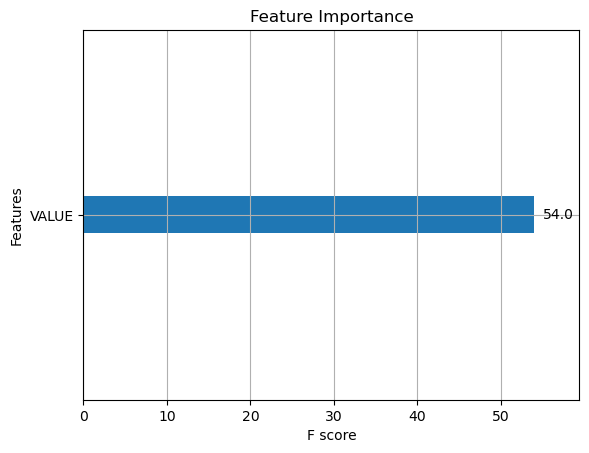

In [ ]:
import xgboost as xgb
from xgboost import plot_importance
import numpy as np


# Convert the dataset into an optimized data structure called Dmatrix that XGBoost supports
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# Specify parameters via map
params = {
    'objective':'binary:logistic',
    'max_depth': 3,
    'learning_rate': 0.1,
    'n_estimators': 100,
    'eval_metric': 'logloss'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

# Predict the probabilities instead of the class labels for the ROC curve
y_pred_proba = bst.predict(dtest)

xgb.plot_importance(bst)
plt.title('Feature Importance')
plt.show()

The plot shows that the feature "Value" has the highest importance in the model. Because it is the only feature shown, it indicates that it is the prdominant predictor of high or low hospital admissions in the dataset. The F-score on the x-axis represents the number of times a feature is used to split the data across all trees within the model. A higher value means the feature is more important.

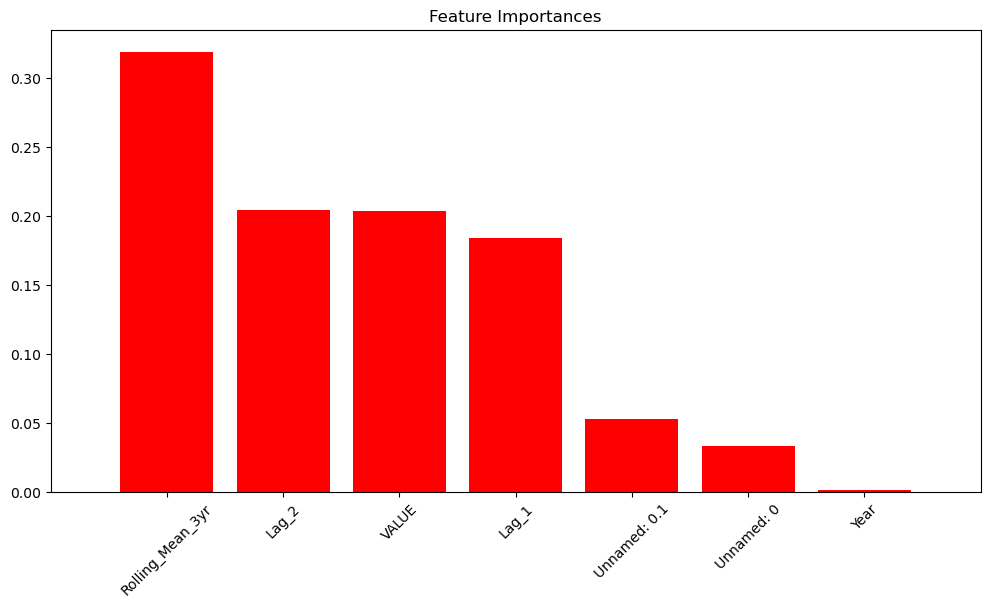

In [87]:

# Extract feature importances
importances = rf_classifier.feature_importances_

# Match the feature indices with their names
#feature_names = ["Rolling_Mean_3yr", "Lag_2", "Lag_1", "Year"]
feature_names = X_train.columns
# Sort the feature importances in descending order
indices = np.argsort(importances)[::-1]

# Plotting the feature importances of the forest
plt.figure(figsize=(12, 6))
plt.title("Feature Importances")
plt.bar(range(len(importances)), importances[indices], color="r", align="center")
# Replace range(len(importances)) with the feature names
plt.xticks(range(len(importances)), feature_names[indices], rotation=45)
plt.xlim([-1, len(importances)])
plt.show()

Rolling_Mean_3yr: This feature has the highest importance score, which suggests that the average number of admissions over the past three years is the most significant predictor for forecasting future admissions. It seems that looking at admissions over a period rather than at a single point in time provides a better signal for the model.

Lag_2: The second most important feature is the number of admissions from two years prior. This indicates that there's a relatively strong year-over-year relationship in the data, with admissions in one year being predictive of admissions two years later.

VALUE: Interestingly, the current year's number of admissions ('VALUE') is the third most important. Since 'VALUE' should be the target variable, its presence as a feature indicates a potential data leakage issue. Normally, the current year's admissions would not be known in advance and thus should not be used as a feature to predict itself. If 'VALUE' is indeed the target variable, it should not be part of the feature set.

Lag_1: The number of admissions from the previous year is also a key predictor, although it's slightly less important than the two-year lag. This lag feature still plays a significant role in the model, indicating the relevance of short-term historical data.

Unnamed: 0.1 and Unnamed: 0: These features have lower importance scores, which makes sense as they are likely indices or row numbers that have been included as features by mistake. These do not hold any meaningful information for the prediction task and should generally be removed before training the model.

Year: The 'Year' feature has the least importance, suggesting that the model does not find the progression of time alone, without the context of admissions data, to be predictive of future admissions. This could also mean that the model is picking up on the more immediate historical patterns in the data rather than long-term trends over time.